<a href="https://colab.research.google.com/github/sachin1033/sachin-chavan1/blob/main/clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import cluster
import pandas as pd
from pandas import DataFrame


In [ ]:
from google.colab import files
upload=files.upload()

Saving Shoppers.csv to Shoppers.csv


In [ ]:
shoppers = pd.read_csv ("Shoppers.csv")
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         29370 non-null  object 
 1   MoB            29370 non-null  int64  
 2   MaxBalance     29370 non-null  float64
 3   PchActiveMths  29370 non-null  int64  
 4   FinCharges     29370 non-null  float64
 5   OnlineTxn      29370 non-null  float64
 6   PaytoBalance   29370 non-null  float64
 7   OfflinePay     29370 non-null  float64
 8   ActiveCards    29370 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 2.0+ MB


In [ ]:
features = ['MoB', 'MaxBalance', 'PchActiveMths', 'FinCharges', 'OnlineTxn', 'PaytoBalance', 'OfflinePay', 'ActiveCards']
feature_names = ['# MoB', 'MaxBalance ($)', '# PchActiveMths', 'FinCharges ($)', '% OnlineTxn', 'PaytoBalance (%)', '% OfflinePay', '# ActiveCards']
feature_longnames = ['# Months on Book', 'Max Balance Amount ($)', '# Purchase Active Months', 'Finance Charges ($)', '% Online Transactions', 'Pay-to-Balance Ratio (%)', '% Offline Payments', '# Active Cards']


In [ ]:
import matplotlib.pyplot as plt


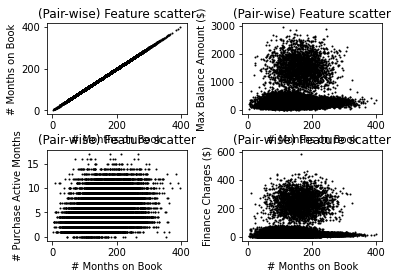

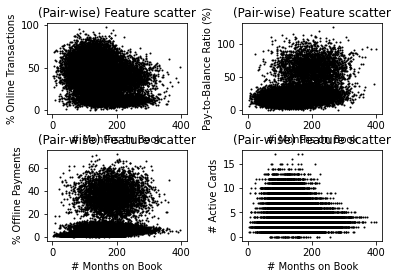

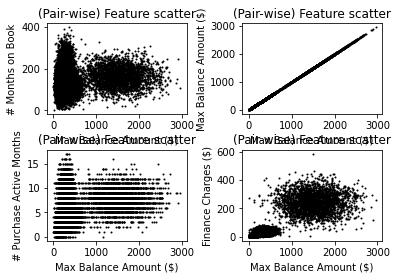

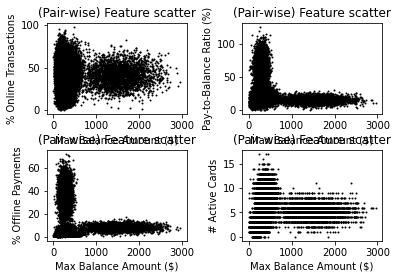

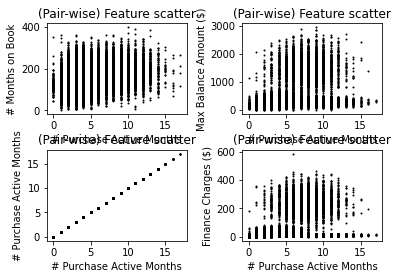

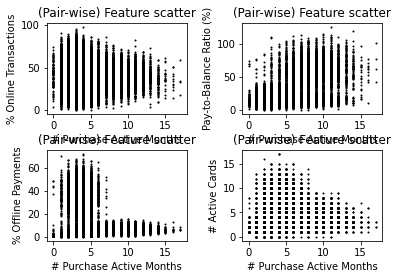

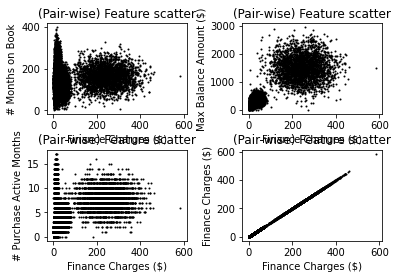

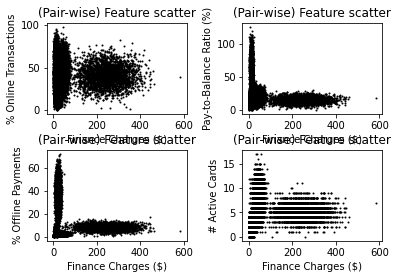

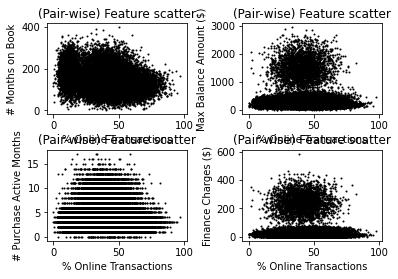

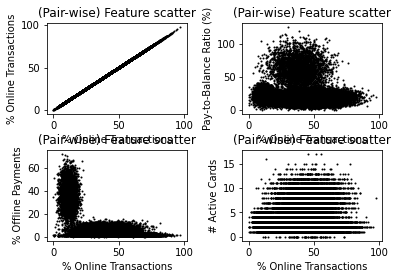

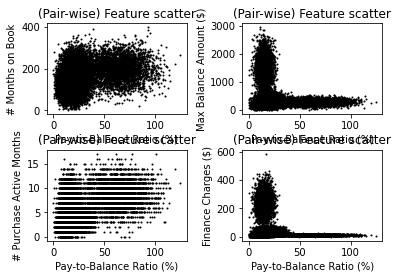

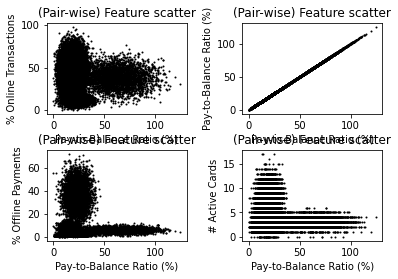

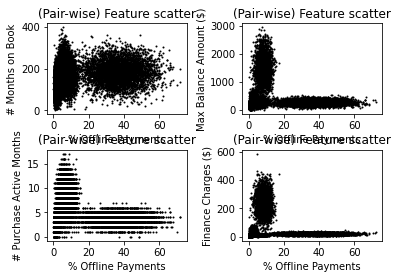

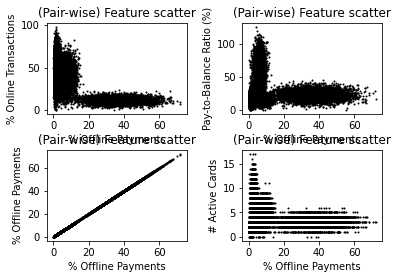

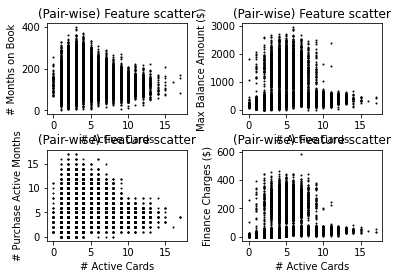

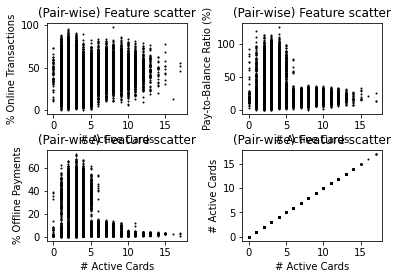

In [ ]:
# Step 4b:  Draw Scatter plots for each "pair-wise" combination of the Features  
for i in range (8):
	fig = plt.figure()
	fig.subplots_adjust (hspace=0.4, wspace=0.4)
	for j in range (4):
		ax = fig.add_subplot (2, 2, j+1)
		ax.scatter (features [i], features [j], data=shoppers, c='k', s=1)
		ax.set_xlabel (feature_longnames [i])
		ax.set_ylabel (feature_longnames [j])
		ax.set_title ('(Pair-wise) Feature scatter')
	fig = plt.figure()
	fig.subplots_adjust (hspace=0.4, wspace=0.4)
	for j in range (4):
		ax = fig.add_subplot (2, 2, j+1)
		ax.scatter (features [i], features [j+4], data=shoppers, c='k', s=1)
		ax.set_xlabel (feature_longnames [i])
		ax.set_ylabel (feature_longnames [j+4])
		ax.set_title ('(Pair-wise) Feature scatter')

In [ ]:
import numpy as np

In [ ]:
# Step 5:  Prepare the data to be used for building the Cluster Analysis model  
# Step 5a:  Create arrays for the Features  
X =  np.array(shoppers [features])
# Step 5b:  Calculate the means and the standard deviations for each of the Features  
mu = X.mean (axis=0)
sigma = X.std (axis=0)
# Step 5c:  Scale the data to be used for building the Cluster Analysis model  
Xs = (X - mu) / sigma


In [ ]:
# Step 6:  Preserve the data scaling parameters in the form of a reusable Scale Matrix  
ScaleMatrix = DataFrame()
ScaleMatrix ['Features'] = features
ScaleMatrix ['Mean'] = mu
ScaleMatrix ['StdDev'] = sigma
ScaleMatrix.to_csv ("Shoppers_Scale Matrix.csv")
print ('Scale Matrix:')
print (ScaleMatrix)
print ('')

Scale Matrix:
        Features        Mean      StdDev
0            MoB  144.686449   51.410328
1     MaxBalance  355.121415  405.656063
2  PchActiveMths    4.068233    2.680878
3     FinCharges   37.933162   70.170425
4      OnlineTxn   40.023305   17.260995
5   PaytoBalance   22.929023   16.371917
6     OfflinePay    7.998980   13.036408
7    ActiveCards    3.465271    2.396805



In [ ]:
# Step 7:  Build the Cluster Analysis models for various numbers of clusters, ranging from a 1-Cluster model through a 12-Cluster model  
# Step 7a:  Define and/or initialize the cluster labels, etc  
n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
iter_cluster_labels = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6', 'Cluster-7', 'Cluster-8', 'Cluster-9', 'Cluster-10', 'Cluster-11', 'Cluster-12']
iter_cluster_sols = ['1-Cluster sol', '2-Cluster sol', '3-Cluster sol', '4-Cluster sol', '5-Cluster sol', '6-Cluster sol', '7-Cluster sol', '8-Cluster sol', '9-Cluster sol', '10-Cluster sol', '11-Cluster sol', '12-Cluster sol']
inertia = np.zeros (12)
size = np.zeros ((12,12))

In [ ]:

# Step 7b:  Iterate the Cluster Analysis over the various numbers of clusters, ranging from a 1-Cluster model through a 12-Cluster model  
for i in range (12):
	algorithm = cluster.KMeans (n_clusters=n_clusters [i], init='k-means++')
	model = algorithm.fit (Xs)
	labels = algorithm.labels_
	cluster_count = len (np.unique(labels))
	inertia [i] = algorithm.inertia_
	print ('K-Means - ', cluster_count, 'Clusters:', '% Variation | within:', 100*inertia [i]/inertia[0], '  versus  between:', 100 - 100*inertia[i]/inertia[0])
	for k in np.unique(labels):
		is_class_member = (labels==k)
		class_sample = X [is_class_member]
		size [i,k] = len (class_sample)

K-Means -  1 Clusters: % Variation | within: 100.0   versus  between: 0.0
K-Means -  2 Clusters: % Variation | within: 74.79790792567997   versus  between: 25.202092074320035
K-Means -  3 Clusters: % Variation | within: 52.71907756936047   versus  between: 47.28092243063953
K-Means -  4 Clusters: % Variation | within: 38.59891627455585   versus  between: 61.40108372544415
K-Means -  5 Clusters: % Variation | within: 28.211027696277217   versus  between: 71.78897230372279
K-Means -  6 Clusters: % Variation | within: 25.61801760997089   versus  between: 74.38198239002911
K-Means -  7 Clusters: % Variation | within: 24.321476387007817   versus  between: 75.67852361299218
K-Means -  8 Clusters: % Variation | within: 23.316208832550036   versus  between: 76.68379116744997
K-Means -  9 Clusters: % Variation | within: 22.455814459355633   versus  between: 77.54418554064436
K-Means -  10 Clusters: % Variation | within: 21.267821261413832   versus  between: 78.73217873858617
K-Means -  11 Clust

In [ ]:
# Step 8:  Explore the Cluster Analysis models for the various numbers of clusters  
# Step 8a:  Examine the sizes of the various clusters, for each iteration (i.e., ranging from a 1-Cluster model through a 12-Cluster model)  
ClusterSizes = DataFrame()
ClusterSizes ['Solution'] = iter_cluster_sols
for p in range(12):
	ClusterSizes [iter_cluster_labels [p]] = size [:,p] / len(Xs) * 100
ClusterSizes.to_csv ("Shoppers_Cluster Sizes.csv")
print ('Cluster Sizes:')
print (ClusterSizes)
print ('')


Cluster Sizes:
          Solution   Cluster-1  Cluster-2  ...  Cluster-10  Cluster-11  Cluster-12
0    1-Cluster sol  100.000000   0.000000  ...    0.000000    0.000000    0.000000
1    2-Cluster sol   64.538645  35.461355  ...    0.000000    0.000000    0.000000
2    3-Cluster sol   64.794007   9.186244  ...    0.000000    0.000000    0.000000
3    4-Cluster sol   64.804222  15.182159  ...    0.000000    0.000000    0.000000
4    5-Cluster sol   51.712632   9.135172  ...    0.000000    0.000000    0.000000
5    6-Cluster sol   10.861423  25.995914  ...    0.000000    0.000000    0.000000
6    7-Cluster sol   15.008512  16.642833  ...    0.000000    0.000000    0.000000
7    8-Cluster sol   17.112700  16.138917  ...    0.000000    0.000000    0.000000
8    9-Cluster sol   17.504256  15.015322  ...    0.000000    0.000000    0.000000
9   10-Cluster sol   17.790262   7.545114  ...    5.512428    0.000000    0.000000
10  11-Cluster sol   18.103507   7.609806  ...   17.248893    4.950630  

In [ ]:
# Step 8b:  Examine the variation in the intra-cluster homogeneity as well as the inter-cluster heterogeneity, as the number of clusters in the model increases  
withinss = 100 * inertia / inertia [0]
betweenss = 100 - withinss
Scree = DataFrame()
Scree ['Solution'] = iter_cluster_sols
Scree ['% Within-Cluster variation'] = withinss
Scree ['% Between-Cluster variation'] = betweenss
Scree.to_csv ("Shoppers_Scree.csv")
print ('Scree:')
print (Scree)
print ('')

Scree:
          Solution  % Within-Cluster variation  % Between-Cluster variation
0    1-Cluster sol                  100.000000                     0.000000
1    2-Cluster sol                   74.797908                    25.202092
2    3-Cluster sol                   52.719078                    47.280922
3    4-Cluster sol                   38.598916                    61.401084
4    5-Cluster sol                   28.211028                    71.788972
5    6-Cluster sol                   25.618018                    74.381982
6    7-Cluster sol                   24.321476                    75.678524
7    8-Cluster sol                   23.316209                    76.683791
8    9-Cluster sol                   22.455814                    77.544186
9   10-Cluster sol                   21.267821                    78.732179
10  11-Cluster sol                   20.453028                    79.546972
11  12-Cluster sol                   19.722122                    80.277878



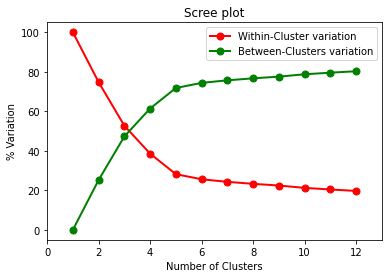

In [ ]:
# Step 8c:  Visualize the variation in the intra-cluster homogeneity as well as the inter-cluster heterogeneity, as the number of clusters in the model increases  
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
ax.plot (n_clusters, withinss, c='r', marker='o', markersize=7, linewidth=2, label='Within-Cluster variation')
ax.plot (n_clusters, betweenss, c='g', marker='o', markersize=7, linewidth=2, label='Between-Clusters variation')
ax.set_xlabel ('Number of Clusters')
ax.set_ylabel ('% Variation')
ax.set_title ('Scree plot')
ax.set_xlim (0, 13)
ax.set_ylim (-5, 105)
ax.legend (loc="best")

In [ ]:
# Step 9:  Build the Cluster Analysis model, with 6 clusters  
# Step 9a:  Build the Cluster Analysis model  
algorithm = cluster.KMeans (n_clusters=6, init='k-means++')
model = algorithm.fit (Xs)

In [ ]:
# Step 9b:  Capture the number of clusters into which the model has segregated the data  
labels = algorithm.labels_
cluster_count = len(np.unique(labels))
print ('K-Means - ', cluster_count, 'Clusters')


K-Means -  6 Clusters


In [ ]:
# Step 9c:  Capture (and "de-scale") the centroids of each of the clusters identified by the model  
centroids = algorithm.cluster_centers_
Centroids = (centroids * sigma) + mu
Centroids = Centroids.T

In [ ]:

# Step 10:  Explore the results of the Cluster Analysis model  
# Step 10a:  Define the labels (i.e., the "identifiers") for the various clusters  
cluster_labels = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6']

In [ ]:

# Step 10b:  Preserve the "scaled" centroids of each of the clusters identified by the model, in the form of a reusable Cluster Model  
ClusterMODEL = DataFrame()
ClusterMODEL ['Features'] = feature_names
centroids = centroids.T
for k in range (cluster_count):
	ClusterMODEL [cluster_labels [k]] = centroids [:,k]
ClusterMODEL.to_csv ("Shoppers_Cluster MODEL.csv")
print ('Cluster MODEL:')
print (ClusterMODEL)
print ('')

Cluster MODEL:
           Features  Cluster-1  Cluster-2  ...  Cluster-4  Cluster-5  Cluster-6
0             # MoB   0.788746  -0.399732  ...   1.082403  -0.405265  -0.469431
1    MaxBalance ($)  -0.199829  -0.448059  ...  -0.165305  -0.420415   0.097506
2   # PchActiveMths  -0.175635  -0.619306  ...   1.776426  -0.533652   0.071318
3    FinCharges ($)  -0.243972  -0.402069  ...  -0.368364  -0.377577   0.087281
4       % OnlineTxn  -1.647268  -0.241499  ...  -0.093285   1.024112   0.371436
5  PaytoBalance (%)   0.003574  -0.414862  ...   2.453006  -0.338365  -0.209687
6      % OfflinePay   2.218383  -0.507298  ...  -0.159230  -0.510779  -0.414522
7     # ActiveCards  -0.181853  -0.549301  ...  -0.174229  -0.560922   2.111125

[8 rows x 7 columns]



In [ ]:

# Step 10c:  Construct the Cluster Profiles matrix from the "de-scaled" centroids of each of the clusters identified by the model  
ClusterProfiles = DataFrame()
ClusterProfiles ['Features'] = feature_names
for j in range (cluster_count):
	ClusterProfiles [cluster_labels [j]] = Centroids [:,j]
ClusterProfiles.to_csv ("Shoppers_Cluster Profiles.csv")
print ('Cluster Profiles:')
print (ClusterProfiles)
print ('')

Cluster Profiles:
           Features   Cluster-1   Cluster-2  ...   Cluster-4   Cluster-5   Cluster-6
0             # MoB  185.236146  124.136071  ...  200.333124  123.851660  120.552841
1    MaxBalance ($)  274.059453  173.363636  ...  288.064310  184.577713  394.675462
2   # PchActiveMths    3.597376    2.407948  ...    8.830615    2.637578    4.259426
3    FinCharges ($)   20.813563    9.719829  ...   12.084903   11.438449   44.057674
4       % OnlineTxn   11.589824   35.854790  ...   38.413112   57.700490   46.434665
5  PaytoBalance (%)   22.987544   16.136932  ...   63.089426   17.389348   19.496041
6      % OfflinePay   36.918727    1.385642  ...    5.923187    1.340253    2.595098
7     # ActiveCards    3.029405    2.148704  ...    3.047679    2.120851    8.525226

[8 rows x 7 columns]



In [ ]:

# Step 10d:  Compare the Cluster Profiles (i.e., the centroids of the various clusters) with the overall data  
ClusterProfilesRelative = DataFrame()
ClusterProfilesRelative ['Features'] = feature_names
ClusterProfilesRelative ['Total'] = np.array (shoppers.mean())
for i in range (len (cluster_labels)):
	ClusterProfilesRelative [cluster_labels [i]] = ClusterProfiles [cluster_labels [i]]
ClusterProfilesRelative.to_csv ("Shoppers_Cluster Profiles (Relative).csv")
print ('Cluster Profiles (Relative):')
print (ClusterProfilesRelative)
print ('')

Cluster Profiles (Relative):
           Features       Total   Cluster-1  ...   Cluster-4   Cluster-5   Cluster-6
0             # MoB  144.686449  185.236146  ...  200.333124  123.851660  120.552841
1    MaxBalance ($)  355.121415  274.059453  ...  288.064310  184.577713  394.675462
2   # PchActiveMths    4.068233    3.597376  ...    8.830615    2.637578    4.259426
3    FinCharges ($)   37.933162   20.813563  ...   12.084903   11.438449   44.057674
4       % OnlineTxn   40.023305   11.589824  ...   38.413112   57.700490   46.434665
5  PaytoBalance (%)   22.929023   22.987544  ...   63.089426   17.389348   19.496041
6      % OfflinePay    7.998980   36.918727  ...    5.923187    1.340253    2.595098
7     # ActiveCards    3.465271    3.029405  ...    3.047679    2.120851    8.525226

[8 rows x 8 columns]



In [ ]:
# Step 10e:  Calibrate the Cluster Profiles (i.e., the centroids of the various clusters) as a proportion of the overall data  
ClusterProfilesRelativepct = DataFrame()
ClusterProfilesRelativepct ['Features'] = feature_names
ClusterProfilesRelativepct ['Total'] = 100 * ClusterProfilesRelative ['Total'] / ClusterProfilesRelative ['Total']
for i in range (len (cluster_labels)):
	ClusterProfilesRelativepct [cluster_labels [i]] = 100 * ClusterProfilesRelative [cluster_labels [i]] / ClusterProfilesRelative ['Total']
ClusterProfilesRelativepct.to_csv ("Shoppers_Cluster Profiles (Relative %).csv")
print ('Cluster Profiles (Relative %)')
print (ClusterProfilesRelativepct)
print ('')


Cluster Profiles (Relative %)
           Features  Total   Cluster-1  ...   Cluster-4   Cluster-5   Cluster-6
0             # MoB  100.0  128.025912  ...  138.460185   85.600041   83.320064
1    MaxBalance ($)  100.0   77.173451  ...   81.117133   51.975945  111.138176
2   # PchActiveMths  100.0   88.426013  ...  217.062667   64.833501  104.699671
3    FinCharges ($)  100.0   54.869042  ...   31.858412   30.154220  116.145536
4       % OnlineTxn  100.0   28.957687  ...   95.976860  144.167230  116.019068
5  PaytoBalance (%)  100.0  100.255223  ...  275.150950   75.839897   85.027785
6      % OfflinePay  100.0  461.542914  ...   74.049276   16.755296   32.442864
7     # ActiveCards  100.0   87.421890  ...   87.949227   61.203029  246.019041

[8 rows x 8 columns]



In [ ]:
# Step 10f:  Examine the sizes of the various clusters identified by the model  
mix =np. zeros (6)
for k in np.unique (labels):
	is_class_member = (labels==k)
	class_sample = X [is_class_member]
	mix [k] = len (class_sample)
ClusterMix = DataFrame()
ClusterMix ['Cluster #'] = cluster_labels
ClusterMix ['% Observations'] = 100 * mix / len (Xs)
ClusterMix.to_csv ("Shoppers_Cluster Mix.csv")
print ('Cluster Mix:')
print (ClusterMix)
print ('')


Cluster Mix:
   Cluster #  % Observations
0  Cluster-1       15.052775
1  Cluster-2       25.910793
2  Cluster-3        9.138577
3  Cluster-4       10.854614
4  Cluster-5       26.213824
5  Cluster-6       12.829418



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         29370 non-null  object 
 1   MoB            29370 non-null  int64  
 2   MaxBalance     29370 non-null  float64
 3   PchActiveMths  29370 non-null  int64  
 4   FinCharges     29370 non-null  float64
 5   OnlineTxn      29370 non-null  float64
 6   PaytoBalance   29370 non-null  float64
 7   OfflinePay     29370 non-null  float64
 8   ActiveCards    29370 non-null  int64  
 9   ClusterID      29370 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 2.2+ MB


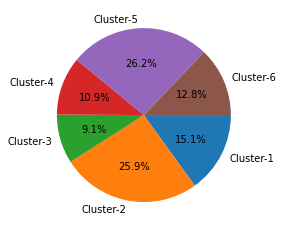

In [ ]:
# Step 10g:  Visualize the sizes of the various clusters identified by the model  
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
ax.pie ('% Observations', labels='Cluster #', data=ClusterMix, counterclock=False, autopct='%1.1f%%')

# Step 11:  Visualize the segregation of the values of the Features, across the various clusters identified by the model  
# Step 11a:  Tag each observation in the data with the label of the corresponding cluster, as identified by the model  
ClusterID = np.repeat('          ', len (Xs))
for i in range (len (Xs)):
	ClusterID [i] = cluster_labels [labels [i]]
shoppers ['ClusterID'] = ClusterID
shoppers.to_csv ("Shoppers (Cluster IDs).csv")
shoppers.info()


In [ ]:
# Step 11:  Visualize the segregation of the values of the Features, across the various clusters identified by the model  
# Step 11a:  Tag each observation in the data with the label of the corresponding cluster, as identified by the model  
ClusterID = np.repeat ('          ', len (Xs))
for i in range (len (Xs)):
	ClusterID [i] = cluster_labels [labels [i]]
shoppers ['ClusterID'] = ClusterID
shoppers.to_csv ("Shoppers (Cluster IDs).csv")
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         29370 non-null  object 
 1   MoB            29370 non-null  int64  
 2   MaxBalance     29370 non-null  float64
 3   PchActiveMths  29370 non-null  int64  
 4   FinCharges     29370 non-null  float64
 5   OnlineTxn      29370 non-null  float64
 6   PaytoBalance   29370 non-null  float64
 7   OfflinePay     29370 non-null  float64
 8   ActiveCards    29370 non-null  int64  
 9   ClusterID      29370 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 2.2+ MB


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

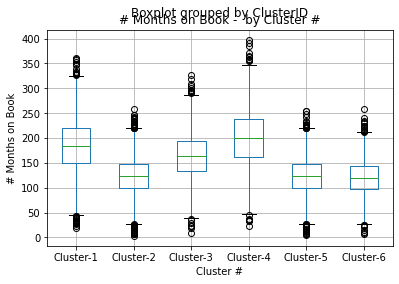

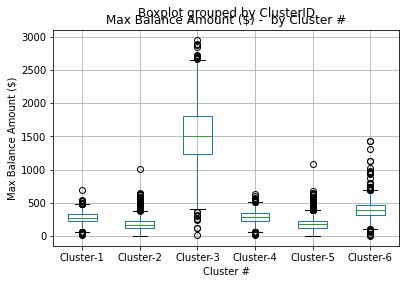

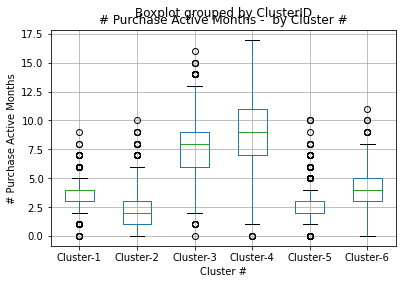

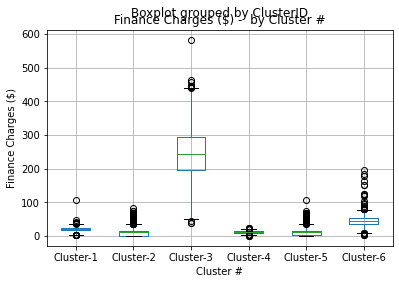

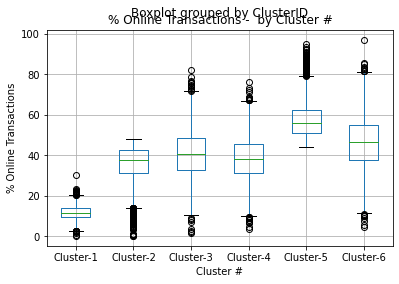

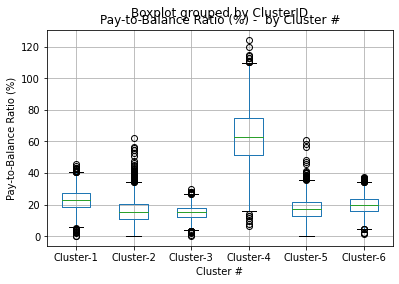

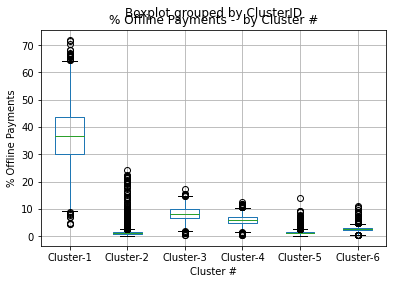

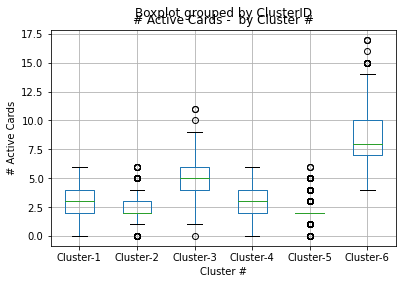

In [ ]:

# Step 11b:  Draw Box Plots for each of the Features, grouped by the various clusters identified by the model  
for i in range (8):
	fig = plt.figure()
	ax = fig.add_subplot (1,1,1)
	shoppers.boxplot (features [i], by = 'ClusterID', ax=ax)
	ax.set_xlabel ('Cluster #')
	ax.set_ylabel (feature_longnames [i])
	ax.set_title (str (feature_longnames [i]) + ' -  by Cluster #')


In [ ]:

# Step 11c:  Compare the Cluster Profiles (i.e., the centroids of the various clusters) with the average values of the Features (grouped by the various clusters identified by the model)  
cluster_means = shoppers [features].groupby (shoppers ['ClusterID']).mean()
cluster_means = cluster_means.T
print ('Cluster Centroids:')
print (cluster_means)
print ('')
print ('Cluster Profiles:')
print (ClusterProfiles)
print ('')


Cluster Centroids:
ClusterID       Cluster-1   Cluster-2  ...   Cluster-5   Cluster-6
MoB            185.236146  123.957162  ...  124.041824  120.526539
MaxBalance     274.059453  173.190988  ...  184.737835  394.618198
PchActiveMths    3.597376    2.403679  ...    2.641642    4.259554
FinCharges      20.813563    9.693516  ...   11.456402   44.061837
OnlineTxn       11.589824   35.876717  ...   57.716981   46.426438
PaytoBalance    22.987544   16.120275  ...   17.404386   19.501494
OfflinePay      36.918727    1.384434  ...    1.341492    2.594206
ActiveCards      3.029405    2.147043  ...    2.121704    8.523355

[8 rows x 6 columns]

Cluster Profiles:
           Features   Cluster-1   Cluster-2  ...   Cluster-4   Cluster-5   Cluster-6
0             # MoB  185.236146  124.136071  ...  200.333124  123.851660  120.552841
1    MaxBalance ($)  274.059453  173.363636  ...  288.064310  184.577713  394.675462
2   # PchActiveMths    3.597376    2.407948  ...    8.830615    2.637578    4.2594